In [5]:
!pip install selenium


  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.6 MB 5.9 MB/s eta 0:00:02
   ------------- -------------------------- 3.1/9.6 MB 6.2 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 6.5 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 6.6 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 6.6 MB/s eta 0:00:01
   ------------------------------------ --- 8.7/9.6 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 9.

In [2]:
!pip install webdriver-manager


In [1]:
# importing libraries and packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
import pandas as pd

In [62]:
# Set Chrome options for the web driver
options = Options()
# options.add_argument("--headless")  
options.add_argument("--disable-gpu")
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# URL of the Flipkart laptop search results page
url = "https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_6_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_6_0_na_na_na&as-pos=6&as-type=TRENDING&suggestionId=tv&requestId=4712f697-5653-43ff-9846-8a6c4fa81ff5"
driver.get(url)
time.sleep(5)

# Initialize empty lists to store scraped data
titles = []
prices = []
categories = []
ratings = []
number_of_reviews = []
page_counter = 0

In [16]:
# Define the maximum number of pages to scrap
max_pages = 40  

while page_counter < max_pages:
    content = driver.page_source
    soup = BeautifulSoup(content, "html.parser")
# Find product containers
    products = soup.find_all("div", class_="cPHDOP col-12-12")

    for product in products:
        # Extract product name
        title = product.find("div", class_="KzDlHZ")
        if title:
            titles.append(title.text)
        else:
            titles.append("Unknown")

        # Extract price
        price = product.find("div", class_="Nx9bqj _4b5DiR")
        if price:
            prices.append(price.text)
        else:
            prices.append('0')

        #  category is set statically
        categories = 'Tv'
    
        # Extract rating
        rating = product.find("div", class_="XQDdHH")
        if rating:
            ratings.append(rating.text)
        else:
            ratings.append("Unknown")

        # Extract number of reviews
        reviews = product.find("span",class_="Wphh3N")
        if reviews:
            number_of_reviews.append(reviews.text)
        else:
            number_of_reviews.append("0")  # No reviews found

    try:
        # Find the "Next" button using an XPath expression and wait until it is clickable
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//a[contains(@class, '_9QVEpD') and span[contains(text(), 'Next')]]"))
        )
        
        print("Next button URL:", next_button.get_attribute("href"))
        
        next_button.click()
        time.sleep(5)  
        
        page_counter += 1   # Increment the page counter after successfully navigating to the next page
    except Exception as e:
        print(f"No more pages to scrape or an error occurred: {e}")
        break  # Exit the loop if no more pages are available or an error occurs


Next button URL: https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_6_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_6_0_na_na_na&as-pos=6&as-type=TRENDING&suggestionId=tv&requestId=4712f697-5653-43ff-9846-8a6c4fa81ff5&page=2
Next button URL: https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_6_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_6_0_na_na_na&as-pos=6&as-type=TRENDING&suggestionId=tv&requestId=4712f697-5653-43ff-9846-8a6c4fa81ff5&page=3
Next button URL: https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_6_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_6_0_na_na_na&as-pos=6&as-type=TRENDING&suggestionId=tv&requestId=4712f697-5653-43ff-9846-8a6c4fa81ff5&page=4
Next button URL: https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_6_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_6_0_na_na_na&as-pos=6&as-type

In [17]:
len(titles)

1161

In [18]:
# Store the scraped data in a DataFrame
data = {
    'Title': titles,
    'Price': prices,
    'Category': categories,
    'Rating': ratings,
    'Number of Reviews': number_of_reviews,
}
df = pd.DataFrame(data)


In [19]:
df

Title      Price Category  \
0                                               Unknown          0       Tv   
1                                               Unknown          0       Tv   
2     Samsung Crystal 4K Infinity Vision 108 cm (43 ...    ₹25,750       Tv   
3     Samsung Crystal 4K Vista 108 cm (43 inch) Ultr...    ₹24,990       Tv   
4     LG AI TV UA8200 108 cm (43 inch) Ultra HD (4K)...    ₹28,990       Tv   
...                                                 ...        ...      ...   
1156  Lloyd 109 cm (43 inch) Full HD LED Smart WebOS TV    ₹22,669       Tv   
1157  Samsung 163 cm (65 inch) Ultra HD (8K) Neo QLE...  ₹3,62,990       Tv   
1158                                            Unknown          0       Tv   
1159                                            Unknown          0       Tv   
1160                                            Unknown          0       Tv   

       Rating               Number of Reviews  
0     Unknown                               0  
1     Unknown                               0  
2         4.3  61,725 Ratings & 4,224 Reviews  
3         4.3  21,477 Ratings & 1,418 Reviews  
4         4.4  30,660 Ratings & 2,089 Reviews  
...       ...                             ...  
1156        4           6 Ratings & 0 Reviews  
1157  Unknown                               0  
1158  Unknown                               0  
1159      4.3                               0  
1160  Unknown                               0  

[1161 rows x 5 columns]

In [20]:
df.shape

(1161, 5)

In [23]:
# Save to CSV file
df.to_csv('flipkart_tv.csv', index=False)

In [24]:
# Close the browser
driver.quit()

In [25]:
import pandas as pd
import numpy as np

# Load your CSV
df = pd.read_csv("flipkart_tv.csv")
print("Initial data shape:", df.shape)
print(df.head())


Initial data shape: (1161, 5)
                                               Title    Price Category  \
0                                            Unknown        0       Tv   
1                                            Unknown        0       Tv   
2  Samsung Crystal 4K Infinity Vision 108 cm (43 ...  ₹25,750       Tv   
3  Samsung Crystal 4K Vista 108 cm (43 inch) Ultr...  ₹24,990       Tv   
4  LG AI TV UA8200 108 cm (43 inch) Ultra HD (4K)...  ₹28,990       Tv   

    Rating               Number of Reviews  
0  Unknown                               0  
1  Unknown                               0  
2      4.3  61,725 Ratings & 4,224 Reviews  
3      4.3  21,477 Ratings & 1,418 Reviews  
4      4.4  30,660 Ratings & 2,089 Reviews  


In [26]:
# Check missing values
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)


Title                0
Price                0
Category             0
Rating               0
Number of Reviews    0
dtype: int64
After dropping duplicates: (898, 5)


In [27]:
# Remove ₹ and commas, convert to float
df['Price'] = df['Price'].str.replace('₹', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Fill missing prices if any
df['Price'] = df['Price'].fillna(df['Price'].median())


In [28]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'] = df['Rating'].fillna(df['Rating'].median())


In [31]:
df['Number of Reviews'] = df['Number of Reviews'].str.replace(',', '', regex=True)
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')
df['Number of Reviews'] = df['Number of Reviews'].fillna(0)


In [30]:
print(df.columns)

Index(['Title', 'Price', 'Category', 'Rating', 'Number of Reviews'], dtype='object')


In [32]:
df['Title'] = df['Title'].str.lower().str.strip()


              Price      Rating  Number of Reviews
count  8.980000e+02  898.000000              898.0
mean   5.107969e+04    4.191537                0.0
std    1.152327e+05    0.253087                0.0
min    0.000000e+00    2.400000                0.0
25%    1.595850e+04    4.100000                0.0
50%    2.949450e+04    4.200000                0.0
75%    5.599000e+04    4.300000                0.0
max    2.999990e+06    5.000000                0.0
Rating
4.2    294
4.3    141
4.1    116
4.4     86
4.0     82
3.9     32
3.8     31
4.5     23
4.7     23
3.7     18
4.6     12
5.0     12
3.6      9
4.8      5
3.3      4
3.5      3
3.1      2
4.9      2
3.0      1
3.4      1
2.4      1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


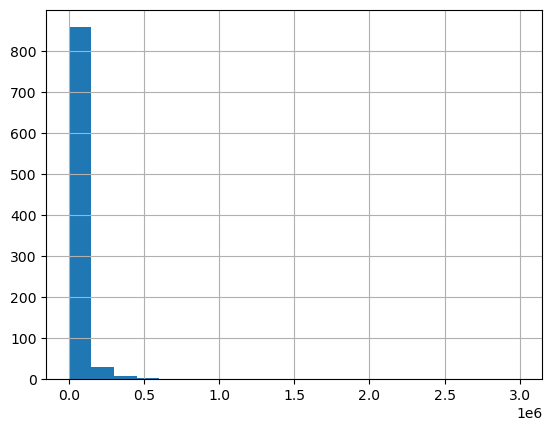

In [33]:
print(df.describe())
print(df['Rating'].value_counts())
print(df['Price'].hist(bins=20))


In [49]:
from sqlalchemy import create_engine
import pandas as pd


In [50]:
# Creates a local database file 'flipkart_tvs.db'
engine = create_engine('sqlite:///flipkart_tv.db')
print("✅ Database engine created!")


✅ Database engine created!


In [51]:
# Assuming your cleaned DataFrame is df
df.to_sql('tvs', con=engine, if_exists='replace', index=False)
print("✅ Data saved to SQLite database successfully!")


✅ Data saved to SQLite database successfully!


In [52]:
query_df = pd.read_sql("SELECT * FROM tvs LIMIT 5", engine)
print(query_df)


                                               Title  Price Category  Rating  \
0                                            unknown      0       Tv     4.2   
1  samsung crystal 4k infinity vision 108 cm (43 ...  25750       Tv     4.3   
2  samsung crystal 4k vista 108 cm (43 inch) ultr...  24990       Tv     4.3   
3  lg ai tv ua8200 108 cm (43 inch) ultra hd (4k)...  28990       Tv     4.4   
4  realme techlife 80 cm (32 inch) qled hd ready ...   8899       Tv     4.3   

   Number of Reviews  Cluster RatingCategory  
0                0.0        0         Medium  
1                0.0        0         Medium  
2                0.0        0         Medium  
3                0.0        0         Medium  
4                0.0        0         Medium  


In [54]:
# K means clutering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric columns for clustering
X = df[['Price', 'Rating', 'Number of Reviews']]  # make sure these exist in your CSV

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # you can choose 3 clusters
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View cluster counts
print(df['Cluster'].value_counts())


Cluster
0    713
2    184
1      1
Name: count, dtype: int64


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


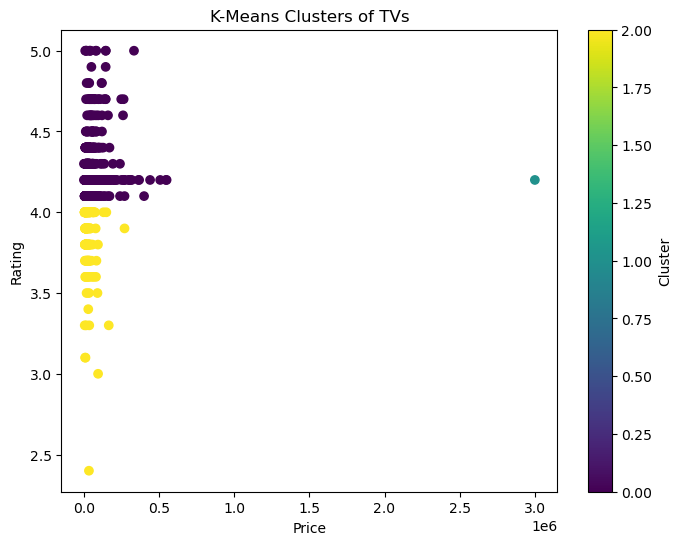

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(df['Price'], df['Rating'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('K-Means Clusters of TVs')
plt.colorbar(label='Cluster')
plt.show()


In [37]:
import pandas as pd
import numpy as np

# Assuming df has 'Rating' column
# Define rating categories
def rating_category(r):
    if r >= 4.5:
        return "High"
    elif r >= 3.5:
        return "Medium"
    else:
        return "Low"

df['RatingCategory'] = df['Rating'].apply(rating_category)
print(df['RatingCategory'].value_counts())


RatingCategory
Medium    812
High       77
Low         9
Name: count, dtype: int64


In [39]:
X = df[['Price', 'Number of Reviews']]   # features
y = df['RatingCategory']       # target


In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # converts High/Medium/Low to 0,1,2


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.8555555555555555
              precision    recall  f1-score   support

        High       0.29      0.33      0.31        15
         Low       0.00      0.00      0.00         2
      Medium       0.93      0.91      0.92       163

    accuracy                           0.86       180
   macro avg       0.41      0.42      0.41       180
weighted avg       0.86      0.86      0.86       180



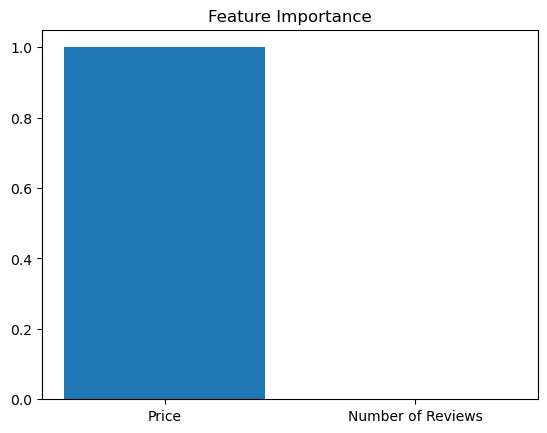

In [43]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.bar(features, importances)
plt.title("Feature Importance")
plt.show()


In [57]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-NN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}



Random Forest Accuracy: 0.86
              precision    recall  f1-score   support

        High       0.29      0.33      0.31        15
         Low       0.00      0.00      0.00         2
      Medium       0.93      0.91      0.92       163

    accuracy                           0.86       180
   macro avg       0.41      0.42      0.41       180
weighted avg       0.86      0.86      0.86       180



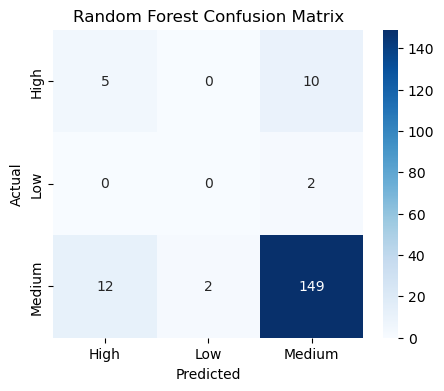


SVM Accuracy: 0.91
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        15
         Low       0.00      0.00      0.00         2
      Medium       0.91      1.00      0.95       163

    accuracy                           0.91       180
   macro avg       0.30      0.33      0.32       180
weighted avg       0.82      0.91      0.86       180



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


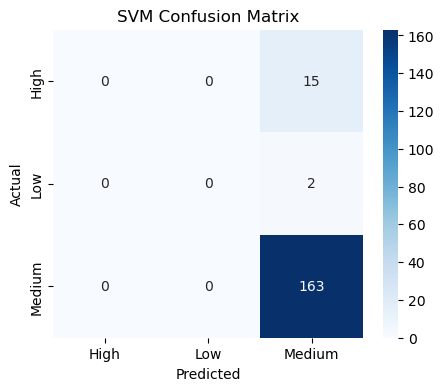


Logistic Regression Accuracy: 0.91
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        15
         Low       0.00      0.00      0.00         2
      Medium       0.91      1.00      0.95       163

    accuracy                           0.91       180
   macro avg       0.30      0.33      0.32       180
weighted avg       0.82      0.91      0.86       180



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


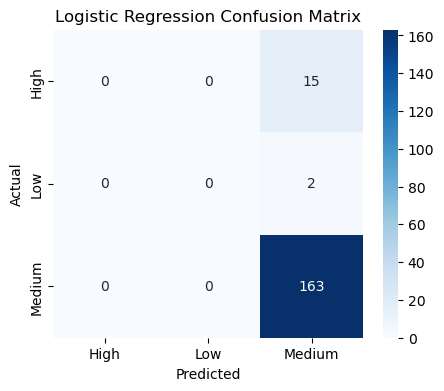


k-NN Accuracy: 0.89
              precision    recall  f1-score   support

        High       0.38      0.20      0.26        15
         Low       0.00      0.00      0.00         2
      Medium       0.92      0.97      0.94       163

    accuracy                           0.89       180
   macro avg       0.43      0.39      0.40       180
weighted avg       0.86      0.89      0.88       180



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


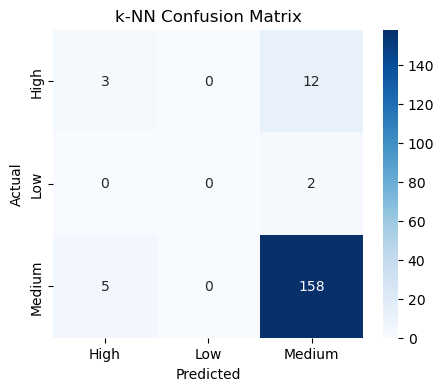

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:19:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetric


XGBoost Accuracy: 0.89
              precision    recall  f1-score   support

        High       0.20      0.07      0.10        15
         Low       0.00      0.00      0.00         2
      Medium       0.91      0.98      0.94       163

    accuracy                           0.89       180
   macro avg       0.37      0.35      0.35       180
weighted avg       0.84      0.89      0.86       180



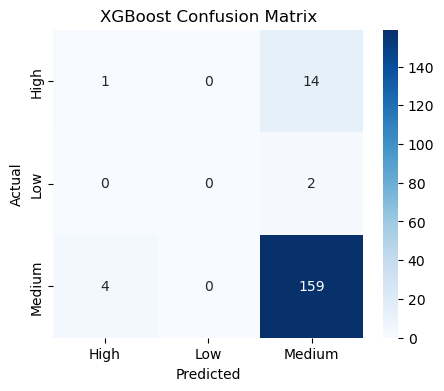

In [58]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


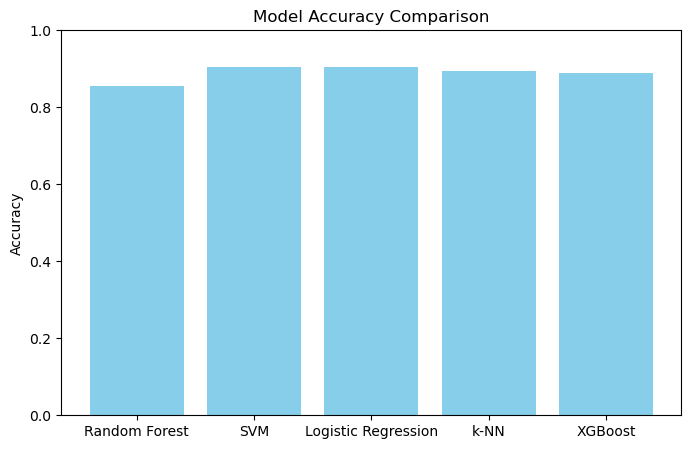

In [59]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy after tuning: 0.9
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        15
         Low       0.00      0.00      0.00         2
      Medium       0.91      0.99      0.95       163

    accuracy                           0.90       180
   macro avg       0.30      0.33      0.32       180
weighted avg       0.82      0.90      0.86       180

Number of features: 2
Number of importances: 2


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Temp\ip

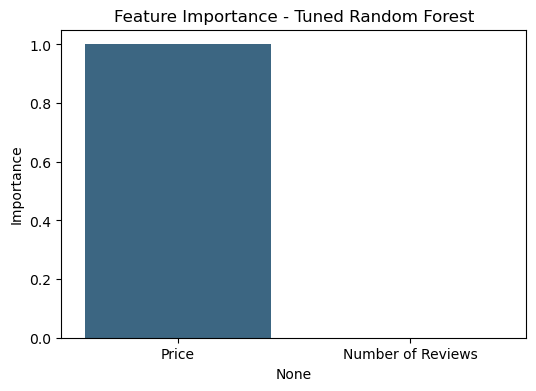

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,          # 3-fold cross-validation
    n_jobs=-1,     # use all CPU cores
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("✅ Best Hyperparameters:", grid_search.best_params_)

# Evaluate tuned model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Accuracy after tuning:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Optional: Feature importance visualization
import matplotlib.pyplot as plt
import seaborn as sns

features = X_train.columns

importances = best_rf.feature_importances_

print("Number of features:", len(features))
print("Number of importances:", len(importances))

plt.figure(figsize=(6,4))
sns.barplot(x=features, y=importances, palette="viridis")
plt.title("Feature Importance - Tuned Random Forest")
plt.ylabel("Importance")
plt.show()